In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Final


In [2]:
num_experiments: Final[int] = 100
bins: Final[int] = 5

Модель Лоренца


In [3]:
x_1_0: Final[int] = 1
x_2_0: Final[int] = 2
x_3_0: Final[int] = 3

h: Final[float] = 0.1
delta: Final[int] = 19

b: Final[int] = 3
r: Final[int] = 2
n: Final[int] = 200

c: Final[float] = 1 / 48

In [4]:
x_1 = np.zeros(n)
x_1[0] = x_1_0

x_2 = np.zeros(n)
x_2[0] = x_2_0

x_3 = np.zeros(n)
x_3[0] = x_3_0


for i in range(1, n):
    x_1[i] = x_1[i - 1] + delta * h * (x_2[i - 1] - x_1[i - 1])

    x_2[i] = x_2[i - 1] + (x_1[i - 1] * (r - x_3[i - 1]) - x_2[i - 1]) * h

    x_3[i] = x_3[i - 1] + (x_1[i - 1] * x_2[i - 1] - b * x_3[i - 1]) * h

In [5]:
delta_h_list = np.zeros(num_experiments)
b_list = np.zeros(num_experiments)
r_list = np.zeros(num_experiments)


for i in range(num_experiments):
    epsilon = np.random.normal(loc=0, scale=np.sqrt(c), size=n)
    # epsilon.sort()

    y_1 = x_1 + epsilon
    y_2 = x_2 + epsilon
    y_3 = x_3 + epsilon

    delta_h_line = (
        2
        * ((y_1**2).mean() - c - (y_1 * y_2).mean())
        / ((y_1**2).mean() - c + (y_2**2).mean() - c - 2 * (y_1 * y_2).mean())
    )
    delta_h_list[i] = delta_h_line

    b_line = (y_1 * y_2).mean() / y_3.mean()
    b_list[i] = b_line

    r_line = (y_2.mean() - c + (y_1 * y_3).mean()) / y_1.mean()
    r_list[i] = r_line

In [6]:
def show_graf_table(lst, bins: int, color: str = "lime") -> None:
    plt.hist(lst, bins=bins, edgecolor="black", color=color)
    # plt.title("Гистограмма частот для оценки параметра delta_h")
    # plt.xlabel("Оценка параметра delta_h")
    # plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

    hist, bin_edges = np.histogram(lst, bins=bins)

    print("Интервал\t\tЧастота")
    for i in range(bins):
        print(f"[{bin_edges[i]:.4f}, {bin_edges[i + 1]:.4f})\t{hist[i]}")

delta_h


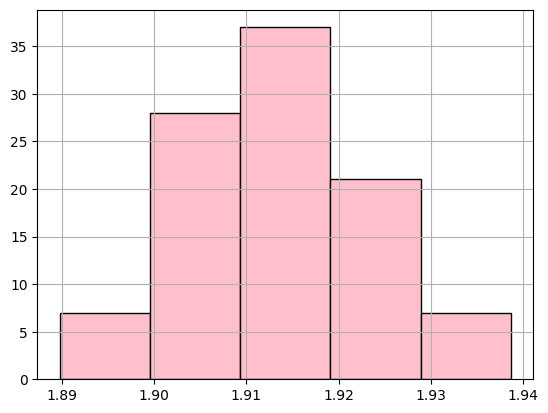

Интервал		Частота
[1.8898, 1.8996)	7
[1.8996, 1.9093)	28
[1.9093, 1.9191)	37
[1.9191, 1.9289)	21
[1.9289, 1.9386)	7


b


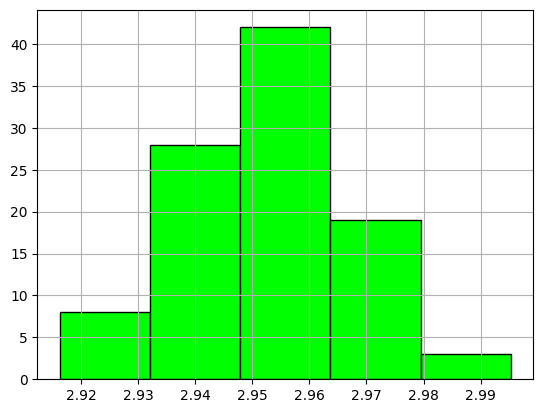

Интервал		Частота
[2.9163, 2.9321)	8
[2.9321, 2.9479)	28
[2.9479, 2.9637)	42
[2.9637, 2.9795)	19
[2.9795, 2.9953)	3


r


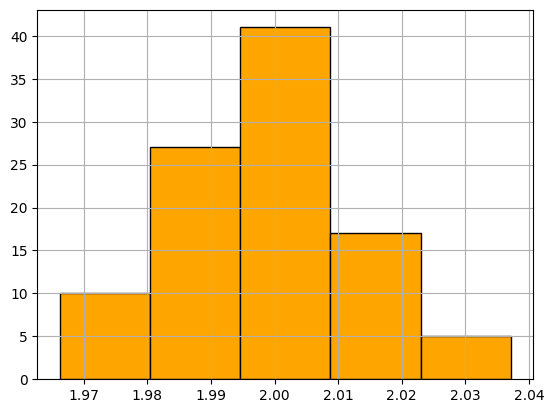

Интервал		Частота
[1.9662, 1.9804)	10
[1.9804, 1.9946)	27
[1.9946, 2.0088)	41
[2.0088, 2.0230)	17
[2.0230, 2.0371)	5


In [7]:
print("delta_h")
show_graf_table(delta_h_list, bins, "pink")

print("\n\nb")
show_graf_table(b_list, bins, "lime")

print("\n\nr")
show_graf_table(r_list, bins, "orange")